# Importation de bibliothèques

In [71]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import math
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif

# Chargement des données

In [72]:
arcene_train = pd.read_csv("./data/ARCENE/arcene_train.data", sep=" ", header=None).drop([10000], axis=1)
arcene_train_labels = pd.read_csv("./data/ARCENE/arcene_train.labels", sep=" ", header=None)
arcene_valid = pd.read_csv("./data/ARCENE/arcene_valid.data", sep=" ", header=None).drop([10000], axis=1)
arcene_valid_labels = pd.read_csv("./data/arcene_valid.labels", sep=" ", header=None)
arcene_test = pd.read_csv("./data/ARCENE/arcene_test.data", sep=" ", header=None).drop([10000], axis=1)

In [73]:
# valid_column_means = arcene_valid.mean()
# 
# train_column_means = arcene_train.mean()

In [74]:
# arcene_valid = arcene_valid.replace(0, valid_column_means)
# arcene_train = arcene_train.replace(0, train_column_means)

# Remplacement des classes cibles de [-1, 1] à [False, True]

In [75]:
arcene_valid_labels = arcene_valid_labels.replace({1: True, -1: False})

arcene_train_labels = arcene_train_labels.replace({1: True, -1: False})

arcene_train_labels

,0
0,True
1,False
2,True
3,True
4,False
...,...
95,False
96,False
97,True
98,False


In [76]:
# arcene_train_concatinated = pd.concat([arcene_train, arcene_train_labels], axis=1, ignore_index=True)
# 
# arcene_valid_concatinated = pd.concat([arcene_valid, arcene_valid_labels], axis=1, ignore_index=True)

# Vérifier si l'ensemble de données est équilibré

       0  count
0  False     56
1   True     44


<Axes: xlabel='0', ylabel='count'>

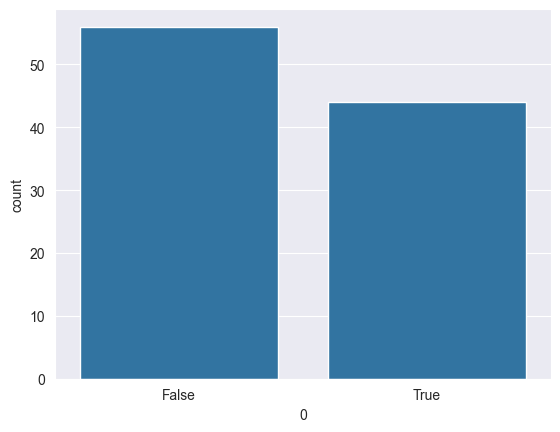

In [77]:
xx = arcene_train_labels[0].value_counts().reset_index()
print(xx)
sns.barplot(x=0, y='count', data=xx)

# Selection des features (caracteristiques)
Due que nous avons 10000 features avec des features aleatoires pour perturber le dataset et les algorithms, nous allons selectionner les features les plus importantes pour notre dataset.

Nous allons utiliser une methode pour selectionner les features les plus importants :
- K-best features

Avant faire ceci, le dataset contient des colonnes avec des valeurs constantes, donc on doit les supprimer.

Cette methode est utilisee pour trouver les colonnes non constantes :

In [78]:
def get_non_constant_columns(dataframe):
    return [col for col in dataframe.columns if len(dataframe[col].unique()) > 1]

keep_columns = get_non_constant_columns(arcene_train)

Pour qu'on apres les laisser dans le dataset.

In [79]:
arcene_train = arcene_train[keep_columns]

arcene_valid = arcene_valid[keep_columns]

arcene_test = arcene_test[keep_columns]

Maintenant on peut utiliser la methode K-best pour selectionner les 120 meilleures caracteristiques.

On va utiliser la fonction f_classif pour calculer la corrélation entre chaque caractéristique et la variable cible.

In [80]:
# Create a SelectKBest object
skb = SelectKBest(score_func=f_classif, # Set f_classif as our criteria to select features
                  k=120)                  # Select top two features based on the criteria

# Train and transform the dataset according to the SelectKBest
arcene_train_filtered = skb.fit_transform(arcene_train, arcene_train_labels)

# Print the results
print('Number of features before feature selection: {}'.format(arcene_train.shape[1]))
print('Number of features after feature selection: {}'.format(arcene_train_filtered.shape[1]))
print('Features selected: {}'.format(skb.get_support(indices=True)))

Number of features before feature selection: 9920
Number of features after feature selection: 120
Features selected: [   4    9   65   85  108  289  306  370  381  408  429  459  461  479
  530  686  770  789  846  860  901  970 1135 1171 1463 1707 1732 1734
 1773 1835 1869 1959 2117 2207 2289 2618 2676 2792 2840 3232 3336 3341
 3527 3573 3584 3660 3693 3787 3952 4036 4087 4149 4253 4481 4518 4587
 4743 4833 4914 4927 4959 4994 5136 5423 5704 5756 5853 5989 6070 6148
 6423 6443 6528 6625 6642 6707 6716 6869 6972 7032 7039 7101 7134 7156
 7365 7406 7476 7562 7585 7589 7635 7651 7668 7682 7790 7846 7854 7909
 7926 8080 8196 8275 8290 8297 8340 8390 8411 8431 8514 8712 8729 8733
 8757 8951 9202 9506 9538 9571 9580 9664]


D:\FST\MST - AIDS\S1\ML\PROJECTS\DEVOIR2\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Concaténation des données d'apprentissage et des étiquettes

In [81]:
arcene_train_filtered = pd.DataFrame(arcene_train_filtered)

arcene_train_filtered_concatinated = pd.concat([arcene_train_filtered, arcene_train_labels], axis=1, ignore_index=True)

arcene_train_filtered_concatinated

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,0,0,0,0,0,466,3,0,0,6,...,0,0,5,450,0,0,0,0,8,True
1,60,0,9,0,0,395,92,85,0,83,...,0,66,75,337,27,89,59,31,65,False
2,0,0,0,0,0,483,19,2,0,21,...,0,0,20,399,0,6,0,0,0,True
3,14,0,0,0,0,439,56,42,0,55,...,0,45,52,476,0,46,18,0,51,True
4,0,1,0,38,0,342,44,19,0,49,...,28,111,48,292,0,24,1,0,122,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,177,164,0,200,0,183,152,203,194,...,0,7,198,94,5,157,130,2,10,False
96,71,163,159,43,136,0,190,171,136,195,...,38,67,197,68,65,175,151,66,65,False
97,0,0,0,15,0,467,0,4,0,2,...,25,0,3,469,0,3,0,0,0,True
98,69,3,19,14,0,420,12,26,0,10,...,25,41,9,432,50,22,41,51,32,False


In [82]:
arcene_valid_filtered = skb.transform(arcene_valid)

arcene_valid_filtered = pd.DataFrame(arcene_valid_filtered)

arcene_valid_filtered_concatinated = pd.concat([arcene_valid_filtered, arcene_valid_labels], axis=1, ignore_index=True)

arcene_valid_filtered_concatinated

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,2,0,0,1,0,410,21,40,0,14,...,9,7,11,392,0,38,41,0,0,False
1,0,222,202,0,145,0,195,160,151,213,...,0,17,222,169,4,164,147,3,12,False
2,53,147,133,39,143,0,137,106,142,145,...,34,61,148,31,61,113,73,59,58,False
3,0,0,4,0,0,437,15,24,0,11,...,0,42,9,453,0,23,10,0,27,True
4,2,0,0,0,0,470,21,24,0,16,...,0,3,13,431,0,25,13,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,92,261,254,86,297,0,274,254,298,282,...,77,102,287,101,88,257,230,86,97,False
96,109,134,121,69,148,145,193,170,150,203,...,68,91,206,130,101,173,153,101,89,False
97,0,0,0,15,0,263,17,0,0,20,...,5,87,19,308,0,1,0,0,95,True
98,0,4,9,0,9,388,83,75,8,80,...,0,0,78,323,0,79,50,0,0,True


In [83]:
arcene_test_filtered = skb.transform(arcene_test)

arcene_test_filtered = pd.DataFrame(arcene_test_filtered)

arcene_test_filtered

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0,16,15,16,7,203,56,38,7,51,...,9,15,92,47,332,0,45,5,0,99
1,69,141,139,66,129,0,140,131,130,145,...,71,63,86,149,208,80,133,123,81,82
2,0,180,160,4,263,241,216,183,276,233,...,0,5,10,242,147,0,187,152,0,1
3,0,0,0,0,0,500,69,72,0,56,...,0,0,7,47,406,0,75,44,0,4
4,84,112,101,78,135,156,133,117,139,143,...,59,74,86,149,140,87,119,99,86,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,55,144,133,0,174,0,136,115,175,143,...,0,0,10,146,149,53,119,95,52,4
696,30,127,121,46,137,57,119,101,138,128,...,38,45,54,133,90,44,104,80,43,51
697,18,214,190,44,218,0,206,166,222,220,...,62,41,73,227,56,65,174,127,65,69
698,38,30,34,28,57,477,27,19,69,33,...,8,35,57,37,383,20,21,1,21,46


# Implementation de l'algorithme Naive Bayes

In [84]:
def encode_class(mydata):
	classes = []
	for i in range(len(mydata)):
		if mydata[i][-1] not in classes:
			classes.append(mydata[i][-1])
	for i in range(len(classes)):
		for j in range(len(mydata)):
			if mydata[j][-1] == classes[i]:
				mydata[j][-1] = i
	return mydata

In [85]:
def splitting(mydata, ratio):
	train_num = int(len(mydata) * ratio)
	train = []
	test = list(mydata)
	while len(train) < train_num:
		index = random.randrange(len(test))
		train.append(test.pop(index))
	return train, test

In [86]:
def groupUnderClass(mydata):
	data_dict = {}
	for i in range(len(mydata)):
		if mydata[i][-1] not in data_dict:
			data_dict[mydata[i][-1]] = []
		data_dict[mydata[i][-1]].append(mydata[i])
	return data_dict

In [87]:
def MeanAndStdDev(numbers):
	avg = np.mean(numbers)
	stddev = np.std(numbers)
	return avg, stddev

def MeanAndStdDevForClass(mydata):
	info = {}
	data_dict = groupUnderClass(mydata)
	for classValue, instances in data_dict.items():
		info[classValue] = [MeanAndStdDev(attribute) for attribute in zip(*instances)]
	return info

In [88]:
def calculateGaussianProbability(x, mean, stdev):
	epsilon = 1e-10
	expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev + epsilon, 2))))
	return (1 / (math.sqrt(2 * math.pi) * (stdev + epsilon))) * expo


def calculateClassProbabilities(info, test):
	probabilities = {}
	for classValue, classSummaries in info.items():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, std_dev = classSummaries[i]
			x = test[i]
			probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
	print(probabilities)
	return probabilities

In [89]:
def predict(info, test):
	probabilities = calculateClassProbabilities(info, test)
	bestLabel = max(probabilities, key=probabilities.get)
	return bestLabel

def getPredictions(info, test):
	predictions = [predict(info, instance) for instance in test]
	print(predictions)
	return predictions

In [90]:
def accuracy_rate(test, predictions):
	correct = sum(1 for i in range(len(test)) if test[i][-1] == predictions[i])
	return (correct / float(len(test))) * 100.0

# Apprentissage et test de l'algorithme

In [91]:
# Apprentissage
info = MeanAndStdDevForClass(arcene_train_filtered_concatinated.values)

# Test
predictions = getPredictions(info, arcene_valid_filtered_concatinated.values)

{True: 0.0, False: 1.6039246740998063e-283}
{True: 0.0, False: 3.0099820334070873e-287}
{True: 0.0, False: 1.3980039967008995e-268}
{True: 2.20728110755404e-236, False: 0.0}
{True: 2.4643969031066857e-244, False: 0.0}
{True: 7.027374345988493e-239, False: 0.0}
{True: 0.0, False: 1.3772580437612362e-291}
{True: 3.2334053491781066e-245, False: 0.0}
{True: 0.0, False: 0.0}
{True: 0.0, False: 1.7204182655654697e-268}
{True: 0.0, False: 0.0}
{True: 0.0, False: 8.110789893030343e-291}
{True: 0.0, False: 6.350879578291261e-282}
{True: 3.0296413849871043e-232, False: 0.0}
{True: 0.0, False: 9.918498967920865e-289}
{True: 0.0, False: 4.4355876573188733e-262}
{True: 0.0, False: 0.0}
{True: 7.049755942990839e-239, False: 0.0}
{True: 4.7452131434053393e-240, False: 0.0}
{True: 0.0, False: 0.0}
{True: 1.8468208819377323e-237, False: 0.0}
{True: 0.0, False: 1.5283643563752338e-272}
{True: 9.742450202558404e-241, False: 0.0}
{True: 0.0, False: 7.332769037250795e-271}
{True: 5.740437351011618e-239, Fa

### Matrice de confusion
La matrice de confusion est une matrice qui permet de visualiser les performances d'un algorithme de classification. 

In [92]:
cm = metrics.confusion_matrix(arcene_valid_labels, predictions)

cm

array([[50,  6],
       [ 0, 44]], dtype=int64)

### Visualisation de la matrice de confusion

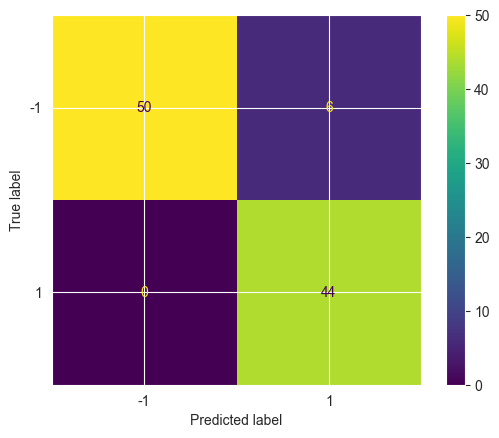

In [93]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])
disp.plot()

plt.show()

### Calcul des métriques
Les métriques qui seront calculées sont :
- Balanced Error Rate
- Accuracy
- Precision
- Recall
- F1 Score
- AUC Score
- ROC Curve

Ces metriques on ete conseillees par les juges du challenge Arcene pour evaluer les performances des algorithmes de classification. (https://web.archive.org/web/20130503080434/http://www.nipsfsc.ecs.soton.ac.uk/evaluation)
Pour plus d'informations sur ces métriques, veuillez consulter ce lien : https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [94]:
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

BER = 1 - (1/2 * ((TP / (TP + FN)) + (TN / (TN + FP))))

precision = metrics.precision_score(arcene_valid_labels, predictions, average='macro')

recall = metrics.recall_score(arcene_valid_labels, predictions, average='macro')

f1_score = metrics.f1_score(arcene_valid_labels, predictions, average='macro')

accuracy = metrics.accuracy_score(arcene_valid_labels, predictions)

auc_score = metrics.roc_auc_score(arcene_valid_labels, predictions)

print('Balanced Error Rate: ', BER)
print('Accuracy:            ', accuracy)
print('Precision:           ', precision)
print('Recall:              ', recall)
print('F1 Score:            ', f1_score)
print('AUC Score:           ', auc_score)

Balanced Error Rate:  0.06000000000000005
Accuracy:             0.94
Precision:            0.94
Recall:               0.9464285714285714
F1 Score:             0.939783219590526
AUC Score:            0.9464285714285715


##### Courbe ROC:

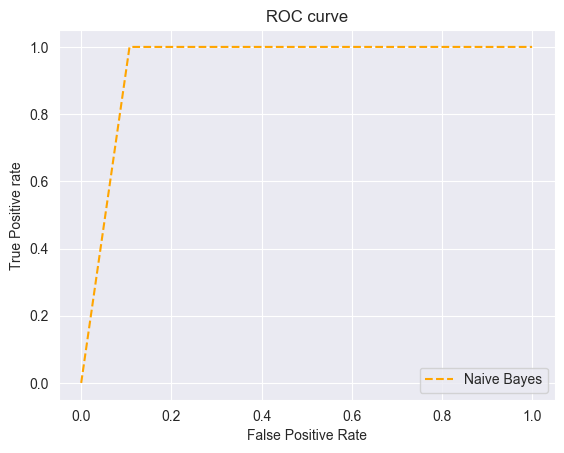

In [95]:
fpr, tpr, thresh = metrics.roc_curve(arcene_valid_labels, predictions, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Ajouter une colonne inutile au donnees de test just pour pouvoir les tester avec l'algorithme.

In [96]:
arcene_test_filtered[120] = 0

Predire les classes des donnees de test:

In [97]:
test_pred = getPredictions(info, arcene_test_filtered.values)

{True: 0.0, False: 9.185158029851641e-271}
{True: 0.0, False: 8.308697627013564e-280}
{True: 0.0, False: 2.5195626350302223e-291}
{True: 0.0, False: 7.618802745283562e-285}
{True: 0.0, False: 1.2721960609443858e-281}
{True: 0.0, False: 3.597388048651499e-263}
{True: 0.0, False: 3.6577140638198676e-278}
{True: 0.0, False: 2.814054701699312e-292}
{True: 0.0, False: 2.7266431500755856e-270}
{True: 0.0, False: 1.9885568017264632e-289}
{True: 0.0, False: 0.0}
{True: 0.0, False: 1.1478157423057856e-262}
{True: 0.0, False: 5.887051599068096e-290}
{True: 0.0, False: 2.561782492331327e-292}
{True: 0.0, False: 7.272165971938601e-281}
{True: 0.0, False: 6.856124956692705e-285}
{True: 0.0, False: 2.4246295539489234e-277}
{True: 0.0, False: 2.318915233413391e-280}
{True: 0.0, False: 3.081897186556936e-267}
{True: 0.0, False: 2.4596581830581373e-276}
{True: 0.0, False: 7.293263401441386e-289}
{True: 0.0, False: 1.0443368870636472e-286}
{True: 0.0, False: 6.859245750975895e-278}
{True: 0.0, False: 6.

### Visualisation des classes predites

       0  count
0  False    669
1   True     31


<Axes: xlabel='0', ylabel='count'>

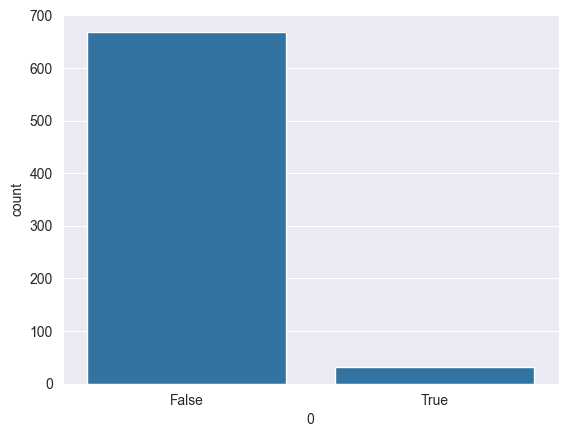

In [98]:
test_pred = pd.DataFrame(test_pred)

yy = test_pred.value_counts().reset_index()
print(yy)
sns.barplot(x=0, y='count', data=yy)

# Comparaison avec l'algorithme Naive Bayes de sklearn
Maintenant on va comparer les resultats obtenus avec notre algorithme avec ceux obtenus avec l'algorithme Naive Bayes de sklearn.

In [99]:
gnb = GaussianNB()

arcene_train_labels_serie = arcene_train_labels.squeeze()

gnb.fit(arcene_train_filtered, arcene_train_labels_serie)

y_pred = gnb.predict(arcene_valid_filtered)

pred_len = len(y_pred)

y_pred = y_pred.reshape(pred_len, 1)

print("Nombre de points mal étiquetés sur un total de %d points : %d" % (arcene_valid.shape[0], (arcene_valid_labels != y_pred).sum().iloc[0]))

Nombre de points mal étiquetés sur un total de 100 points : 30


### Matrice de confusion

In [100]:
cm_with_sklearn = metrics.confusion_matrix(arcene_valid_labels, y_pred)

cm_with_sklearn

array([[37, 19],
       [11, 33]], dtype=int64)

### Visualisation de la matrice de confusion

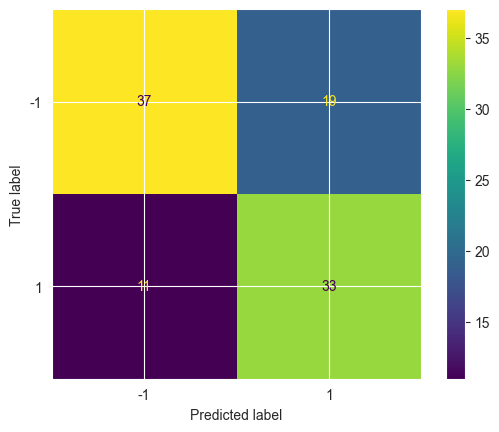

In [101]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_with_sklearn, display_labels=[-1, 1])
disp.plot()

plt.show()

### Calcul des métriques
Les métriques qui seront calculées sont :
- Balanced Error Rate
- Accuracy
- Precision
- Recall
- F1 Score
- AUC Score
- ROC Curve

In [102]:
TP_with_sklearn = cm_with_sklearn[0][0]
FP_with_sklearn = cm_with_sklearn[0][1]
FN_with_sklearn = cm_with_sklearn[1][0]
TN_with_sklearn = cm_with_sklearn[1][1]

BER_with_sklearn = 1 - (1/2 * ((TP_with_sklearn / (TP_with_sklearn + FN_with_sklearn)) + (TN_with_sklearn / (TN_with_sklearn + FP_with_sklearn))))

precision_with_sklearn = metrics.precision_score(arcene_valid_labels, y_pred, average='macro')

recall_with_sklearn = metrics.recall_score(arcene_valid_labels, y_pred, average='macro')

f1_score_with_sklearn = metrics.f1_score(arcene_valid_labels, y_pred, average='macro')

accuracy_with_sklearn = metrics.accuracy_score(arcene_valid_labels, y_pred)

auc_score_with_sklearn = metrics.roc_auc_score(arcene_valid_labels, y_pred)

print('Balanced Error Rate: ', BER_with_sklearn)
print('Accuracy:            ', accuracy_with_sklearn)
print('Precision:           ', precision_with_sklearn)
print('Recall:              ', recall_with_sklearn)
print('F1 Score:            ', f1_score_with_sklearn)
print('AUC Score:           ', auc_score_with_sklearn)

Balanced Error Rate:  0.29727564102564097
Accuracy:             0.7
Precision:            0.702724358974359
Recall:               0.7053571428571428
F1 Score:             0.6995192307692308
AUC Score:            0.7053571428571428


##### Courbe ROC:

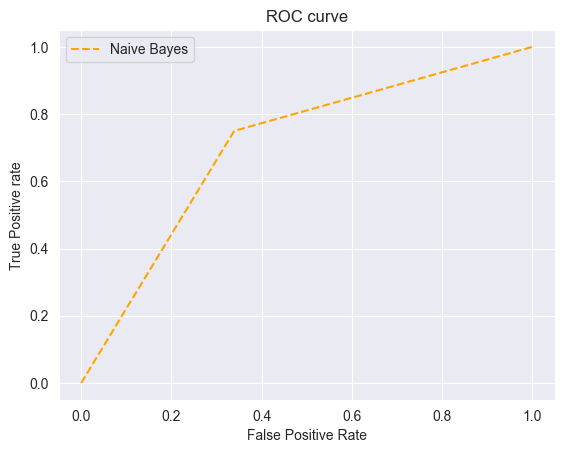

In [103]:
fpr_with_sklearn, tpr_with_sklearn, thresh_with_sklearn = metrics.roc_curve(arcene_valid_labels, y_pred, pos_label=1)

# plot roc curves
plt.plot(fpr_with_sklearn, tpr_with_sklearn, linestyle='--',color='orange', label='Naive Bayes')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Predire les classes des donnees de test:

In [104]:
arcene_test_filtered_serie = arcene_test_filtered.drop([120], axis=1).squeeze()

test_pred_with_sklearn = gnb.predict(arcene_test_filtered_serie)

### Visualisation des classes predites

       0  count
0   True    432
1  False    268


<Axes: xlabel='0', ylabel='count'>

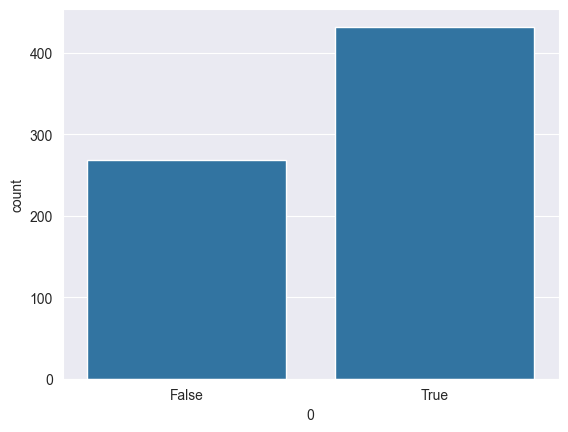

In [105]:
test_pred_with_sklearn = pd.DataFrame(test_pred_with_sklearn)

yy_with_sklearn = test_pred_with_sklearn.value_counts().reset_index()
print(yy_with_sklearn)
sns.barplot(x=0, y='count', data=yy_with_sklearn)

# Implementation de l'algorithme Extreme Gradient Boosting (XGBoost):

In [106]:
# from sklearn.feature_selection import RFE
# 
# model = XGBoostClassifier()
# 
# rfe = RFE(estimator=model, n_features_to_select=5)
# 
# rfe = rfe.fit(arcene_train, arcene_train_labels)
# 
# rfe.support_
# 
# rfe.ranking_
# 
# arcene_train_filtered_2 = rfe.transform(arcene_train)
# 
# arcene_train_filtered_2 = pd.DataFrame(arcene_train_filtered_2)
# 
# arcene_valid_filtered_2 = rfe.transform(arcene_valid)
# 
# arcene_valid_filtered_2 = pd.DataFrame(arcene_valid_filtered_2)
# 
# y_pred = model.fit(arcene_train_filtered_2, arcene_train_labels).predict(arcene_valid_filtered_2)
# 
# pred_len = len(y_pred)
# 
# y_pred = y_pred.reshape(pred_len, 1)
# 
# print("Number of mislabeled points out of a total %d points : %d" % (arcene_valid.shape[0], (arcene_valid_labels != y_pred).sum()))